# Business Case Study: Audiobook app

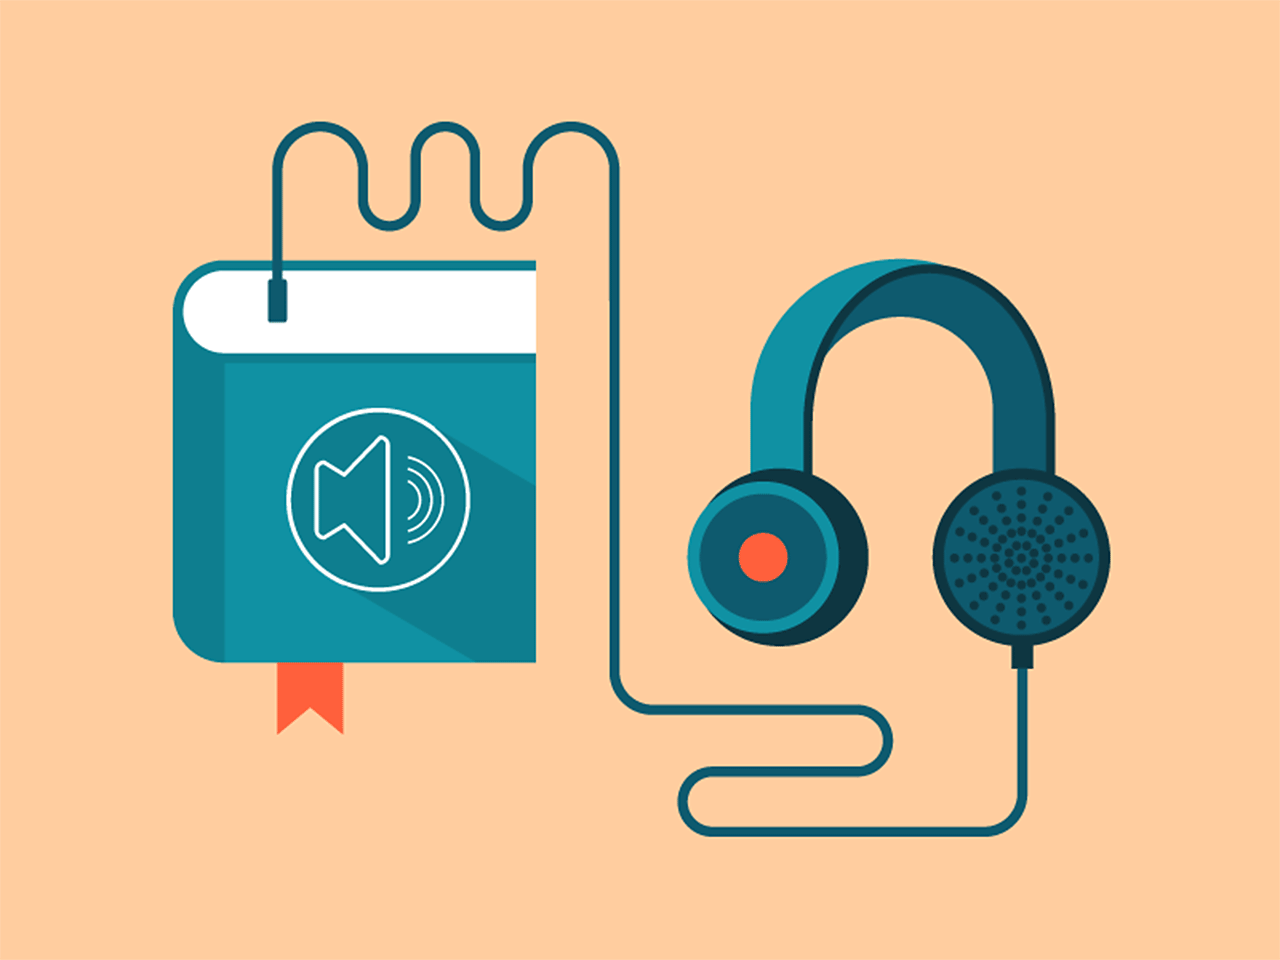

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books.  We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
data = pd.read_csv("/kaggle/input/audiobook-app-data/audiobook_data_2.csv", index_col=0)
data.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
994,1620.00,1620,19.73,19.73,1,10.00,0.99,1603.80,5,92,0
1143,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,0,0
2059,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,388,0
2882,1620.00,1620,5.96,5.96,0,8.91,0.42,680.40,1,129,0
3342,2160.00,2160,5.33,5.33,0,8.91,0.22,475.20,0,361,0


# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

# 2. Exploratory Data Analysis

In [3]:
data.describe()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00
mean,1591.28,1678.61,7.10,7.54,0.16,8.91,0.13,189.89,0.07,61.94,0.16
std,504.34,654.84,4.93,5.56,0.37,0.64,0.24,371.08,0.47,88.21,0.37
min,216.00,216.00,3.86,3.86,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1188.00,1188.00,5.33,5.33,0.00,8.91,0.00,0.00,0.00,0.00,0.00
50%,1620.00,1620.00,5.95,6.07,0.00,8.91,0.00,0.00,0.00,11.00,0.00
75%,2160.00,2160.00,8.00,8.00,0.00,8.91,0.13,194.40,0.00,105.00,0.00
max,2160.00,7020.00,130.94,130.94,1.00,10.00,1.00,2160.00,30.00,464.00,1.00


In [4]:
data.isnull().sum()

Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14084 entries, 994 to 251
Data columns (total 11 columns):
Book_length(mins)_overall          14084 non-null float64
Book_length(mins)_avg              14084 non-null int64
Price_overall                      14084 non-null float64
Price_avg                          14084 non-null float64
Review                             14084 non-null int64
Review10/10                        14084 non-null float64
Completion                         14084 non-null float64
Minutes_listened                   14084 non-null float64
Support_Request                    14084 non-null int64
Last_Visited_mins_Purchase_date    14084 non-null int64
Target                             14084 non-null int64
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [6]:
data['Book_length(mins)_overall'].value_counts()

2160.00    4712
1620.00    4149
1188.00    2851
648.00      712
1080.00     567
324.00      300
540.00      115
1404.00     112
1890.00     110
1674.00      98
1134.00      52
216.00       51
1656.00      27
1476.00      23
1350.00      21
756.00       21
918.00       15
1332.00      14
864.00       13
1242.00      13
1296.00      10
1152.00       8
972.00        7
1116.00       7
486.00        6
1377.00       5
1224.00       5
1512.00       5
1368.00       5
594.00        4
432.00        4
1044.00       4
702.00        3
1008.00       3
684.00        3
1161.00       2
1269.00       2
504.00        2
576.00        2
945.00        1
720.00        1
1231.20       1
990.00        1
378.00        1
1170.00       1
1098.00       1
1252.80       1
828.00        1
1058.40       1
928.80        1
999.00        1
810.00        1
1431.00       1
1440.00       1
1002.86       1
1062.00       1
1339.20       1
270.00        1
612.00        1
1260.00       1
Name: Book_length(mins)_overall, dtype: 

In [7]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [8]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [9]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

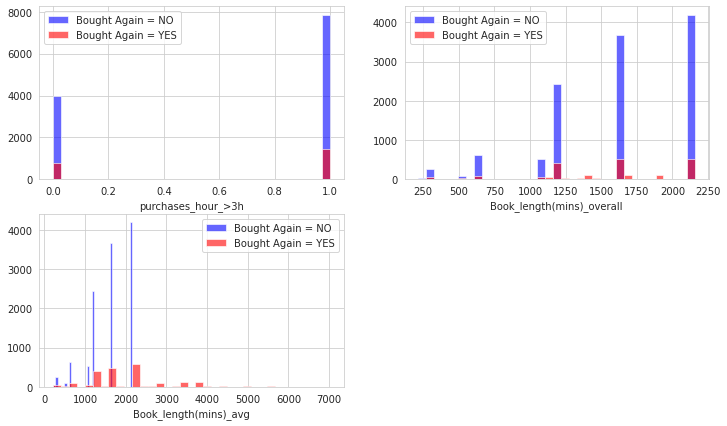

In [10]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

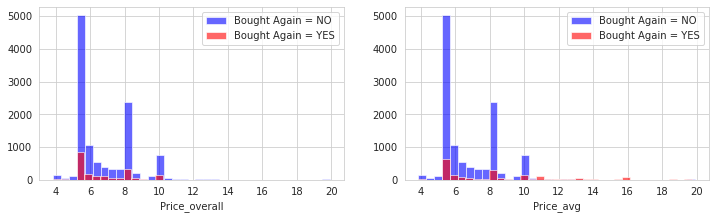

In [11]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [12]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0   0.84
1   0.16
Name: Target, dtype: float64
0   0.83
1   0.17
Name: Target, dtype: float64


In [13]:
data['Review10/10'].value_counts()

8.91     11616
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
8.33         2
5.50         2
8.67         2
7.50         2
6.67         1
1.50         1
9.40         1
7.75         1
4.50         1
9.67         1
Name: Review10/10, dtype: int64

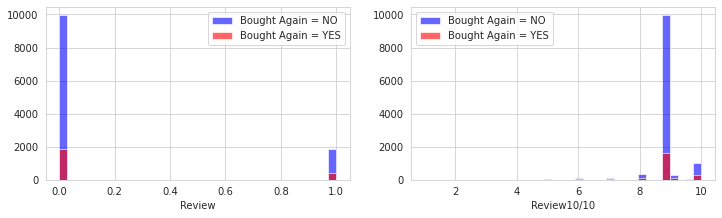

In [14]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [15]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [16]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

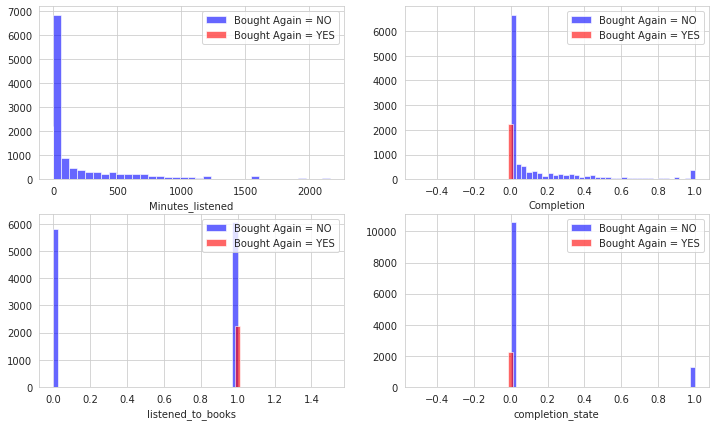

In [17]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [18]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [19]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [20]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [21]:
data.Last_Visited_mins_Purchase_date.value_counts()

0      5493
1       357
2       198
3       165
5       140
       ... 
354       1
338       1
369       1
464       1
379       1
Name: Last_Visited_mins_Purchase_date, Length: 371, dtype: int64

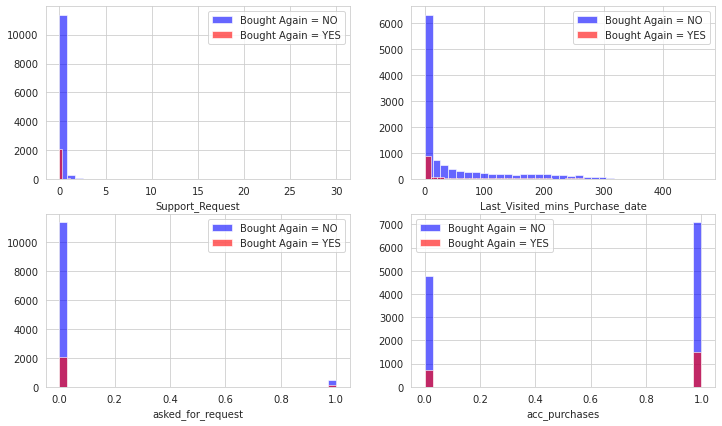

In [22]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [23]:
data.drop('Support_Request', axis=1, inplace=True)

In [24]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Handling categorical features

- Balance the dataset. 

### Handling categorical features

In [25]:
dummies = [column for column in data.drop('Target', axis=1).columns if data[column].nunique() < 10]

In [26]:
data_1 = pd.get_dummies(data, columns=dummies, drop_first=True)
data_1.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review10/10,Completion,Last_Visited_mins_Purchase_date,Target,Review_1,purchases_hour_>3h_1,listened_to_books_1,completion_state_1,asked_for_request_1,acc_purchases_1
994,1620.00,1620,19.73,19.73,10.00,0.99,92,0,1,1,0,1,1,1
1143,2160.00,2160,5.33,5.33,8.91,0.00,0,0,0,1,1,0,0,0
2059,2160.00,2160,5.33,5.33,8.91,0.00,388,0,0,1,1,0,0,1
2882,1620.00,1620,5.96,5.96,8.91,0.42,129,0,0,1,0,0,1,1
3342,2160.00,2160,5.33,5.33,8.91,0.22,361,0,0,1,0,0,0,1


In [27]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14084 entries, 994 to 251
Data columns (total 14 columns):
Book_length(mins)_overall          14084 non-null float64
Book_length(mins)_avg              14084 non-null int64
Price_overall                      14084 non-null float64
Price_avg                          14084 non-null float64
Review10/10                        14084 non-null float64
Completion                         14084 non-null float64
Last_Visited_mins_Purchase_date    14084 non-null int64
Target                             14084 non-null int64
Review_1                           14084 non-null uint8
purchases_hour_>3h_1               14084 non-null uint8
listened_to_books_1                14084 non-null uint8
completion_state_1                 14084 non-null uint8
asked_for_request_1                14084 non-null uint8
acc_purchases_1                    14084 non-null uint8
dtypes: float64(5), int64(3), uint8(6)
memory usage: 1.0 MB


### Check Duplicate columns and Rows

In [28]:
# print(data_1.shape)

# # Remove duplicate Features
# data_1 = data_1.T.drop_duplicates()
# data_1 = data_1.T

# # Remove Duplicate Rows
# data_1.drop_duplicates(inplace=True)

# print(data_1.shape)

In [29]:
data_1.Target.value_counts()

0    11847
1     2237
Name: Target, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X = data_1.drop('Target', axis=1)
y = data_1.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 4. Model Building

## Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l2')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.26%
_______________________________________________
Classification Report:	Precision Score: 92.24%
			Recall Score: 43.76%
			F1 score: 59.36%
_______________________________________________
Confusion Matrix: 
 [[8197   59]
 [ 901  701]]

Test Result:
Accuracy Score: 91.24%
_______________________________________________
Classification Report:	Precision Score: 93.16%
			Recall Score: 45.04%
			F1 score: 60.72%
_______________________________________________
Confusion Matrix: 
 [[3570   21]
 [ 349  286]]



### Cross Validation Score for Logistic Regression

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X, y, cv=5)
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

Logistic Accuracy: 90.34% +/- (0.45)


## Random Forest Classifier

In [34]:
zeros = (y_train.value_counts()[0] / y_train.shape)[0]
ones = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Doesn't purchase again users Rate: {zeros * 100:.2f}%")
print(f"Purchase again users Rate: {ones * 100 :.2f}%")

Doesn't purchase again users Rate: 83.75%
Purchase again users Rate: 16.25%


In [35]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.08%
_______________________________________________
Classification Report:	Precision Score: 97.87%
			Recall Score: 77.59%
			F1 score: 86.56%
_______________________________________________
Confusion Matrix: 
 [[8229   27]
 [ 359 1243]]

Test Result:
Accuracy Score: 90.39%
_______________________________________________
Classification Report:	Precision Score: 71.56%
			Recall Score: 59.84%
			F1 score: 65.18%
_______________________________________________
Confusion Matrix: 
 [[3440  151]
 [ 255  380]]



In [36]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight={0:zeros, 1:ones})

param_grid = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
rf_grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 21.3min
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 63.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.837492391965916,
                                                            1: 0.16250760803408398},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction...
                                              n_estimators=100, n_jobs=None,
                   

In [37]:
rf_grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.837492391965916,
                                     1: 0.16250760803408398},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rf_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=15,
                                min_samples_leaf=1, 
                                min_samples_split=10,
                                n_estimators=500, 
                                oob_score=True, 
                                class_weight={0:zeros, 1:ones})

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.50%
_______________________________________________
Classification Report:	Precision Score: 99.35%
			Recall Score: 48.00%
			F1 score: 64.73%
_______________________________________________
Confusion Matrix: 
 [[8251    5]
 [ 833  769]]

Test Result:
Accuracy Score: 91.88%
_______________________________________________
Classification Report:	Precision Score: 99.32%
			Recall Score: 46.30%
			F1 score: 63.16%
_______________________________________________
Confusion Matrix: 
 [[3589    2]
 [ 341  294]]



### Cross Validation Score for Random Forest Classifier

In [39]:
scores = cross_val_score(rf_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.67057101 0.61748634 0.63206107 0.60829493 0.61180124]
Random Forest F1_score: 62.80% +/- (2.28)


## XGBoost Classifier

In [40]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.73%
_______________________________________________
Classification Report:	Precision Score: 97.88%
			Recall Score: 69.04%
			F1 score: 80.97%
_______________________________________________
Confusion Matrix: 
 [[8232   24]
 [ 496 1106]]

Test Result:
Accuracy Score: 90.70%
_______________________________________________
Classification Report:	Precision Score: 77.25%
			Recall Score: 54.02%
			F1 score: 63.58%
_______________________________________________
Confusion Matrix: 
 [[3490  101]
 [ 292  343]]



In [41]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)

hyperparameter_grid = {'colsample_bytree': [ 0.5, 0.75, 0.85, 0.9, 1], 
                       'colsample_bylevel': [ 0.5, 0.75, 0.85, 0.9, 1],
                       'colsample_bynode': [ 0.5, 0.75, 0.85, 0.9, 1],
#                        'learning_rate' : [0.01, 0.5, 0.1], 
#                        'n_estimators': [100, 350, 500],
                       'min_child_weight' : [2, 3, 5, 10],
                       'max_depth': [3, 5, 10, 15], 
#                        'base_score' : [0.1, 0.5, 0.9]
                      }

xgb_grid_cv = GridSearchCV(xgb_clf, hyperparameter_grid, scoring="f1", 
                           n_jobs=-1, verbose=1, cv=3)
# xgb_grid_cv.fit(X_train, y_train)

In [42]:
# xgb_grid_cv.best_estimator_

In [43]:
xgb_clf = XGBClassifier(base_score=0.3, 
                        min_child_weight=2,
                        max_depth=3,
                        colsample_bytree=0.85,
                        colsample_bylevel=0.5,
                        colsample_bynode=0.5,
                        learning_rate=0.5, 
                        n_estimators=150)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.05%
_______________________________________________
Classification Report:	Precision Score: 96.69%
			Recall Score: 52.87%
			F1 score: 68.36%
_______________________________________________
Confusion Matrix: 
 [[8227   29]
 [ 755  847]]

Test Result:
Accuracy Score: 91.77%
_______________________________________________
Classification Report:	Precision Score: 90.65%
			Recall Score: 50.39%
			F1 score: 64.78%
_______________________________________________
Confusion Matrix: 
 [[3558   33]
 [ 315  320]]



### Cross Validation Score for Random Forest Classifier

In [44]:
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.67801047 0.51749735 0.64094955 0.6163142  0.61840121]
XGBoost F1_score: 61.42% +/- (5.32)
